In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [10]:
df_eda = pd.read_csv('..\\Datasets\\user_review_tratamientoML.csv')

In [11]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20357 entries, 0 to 20356
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item_id    20357 non-null  int64  
 1   recommend  20357 non-null  bool   
 2   sentiment  20357 non-null  int64  
 3   year       18472 non-null  float64
dtypes: bool(1), float64(1), int64(2)
memory usage: 497.1 KB


In [12]:
df_eda_1 = pd.read_parquet('..\\Datasets\\steam_games_cleaned.parquet')

In [13]:
df_eda_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32133 entries, 0 to 32132
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   genres     28851 non-null  object 
 1   name       32132 non-null  object 
 2   tags       31971 non-null  object 
 3   specs      31464 non-null  object 
 4   price      28846 non-null  float64
 5   item_id    32133 non-null  float64
 6   developer  28900 non-null  object 
 7   year       32133 non-null  Int64  
dtypes: Int64(1), float64(2), object(5)
memory usage: 2.0+ MB


In [14]:
merged_df = df_eda.merge(df_eda_1, on='item_id', how='inner')

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18472 entries, 0 to 18471
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item_id    18472 non-null  int64  
 1   recommend  18472 non-null  bool   
 2   sentiment  18472 non-null  int64  
 3   year_x     18472 non-null  float64
 4   genres     17246 non-null  object 
 5   name       18472 non-null  object 
 6   tags       18471 non-null  object 
 7   specs      18428 non-null  object 
 8   price      13248 non-null  float64
 9   developer  17247 non-null  object 
 10  year_y     18472 non-null  Int64  
dtypes: Int64(1), bool(1), float64(2), int64(2), object(5)
memory usage: 1.4+ MB


In [16]:
merged_df.drop(columns=['year_y'], inplace=True)

In [17]:
merged_df.head(3)

,item_id,recommend,sentiment,year_x,genres,name,tags,specs,price,developer
0,1250,True,2,2009.0,[Action],Killing Floor,"[FPS, Zombies, Co-op, Survival, Action, Multip...","[Single-player, Multi-player, Co-op, Cross-Pla...",19.99,Tripwire Interactive
1,22200,True,2,2009.0,"[Action, Indie]",Zeno Clash,"[Action, Indie, Surreal, Beat 'em up, FPS, Fig...","[Single-player, Steam Achievements, Steam Trad...",9.99,ACE Team
2,227300,True,2,2013.0,"[Indie, Simulation]",Euro Truck Simulator 2,"[Simulation, Driving, Open World, Realistic, R...","[Single-player, Steam Achievements, Steam Trad...",19.99,SCS Software


In [18]:
merged_df.isnull()

,item_id,recommend,sentiment,year_x,genres,name,tags,specs,price,developer
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
18467,False,False,False,False,False,False,False,False,False,False
18468,False,False,False,False,False,False,False,False,True,False
18469,False,False,False,False,False,False,False,False,True,False
18470,False,False,False,False,False,False,False,False,True,False


In [19]:
recommend_counts = merged_df['recommend'].value_counts()
recommend_counts


recommend
True     16585
False     1887
Name: count, dtype: int64

In [20]:
sentiment_counts = merged_df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
2    11920
1     3524
0     3028
Name: count, dtype: int64


In [21]:
merged_df.describe()

,item_id,sentiment,year_x,price
count,18472.000000,18472.000000,18472.000000,13248.000000
mean,158188.296773,1.481377,2012.127111,18.023847
std,126705.915919,0.759955,3.300069,15.309659
min,10.000000,0.000000,1990.000000,0.490000
25%,6000.000000,1.000000,2011.000000,9.990000
50%,211270.000000,2.000000,2013.000000,14.990000
75%,252330.000000,2.000000,2014.000000,19.990000
max,428880.000000,2.000000,2017.000000,771.710000


El presente grafico nos ayuda a entender como se distribuyen los precios en el dataframe

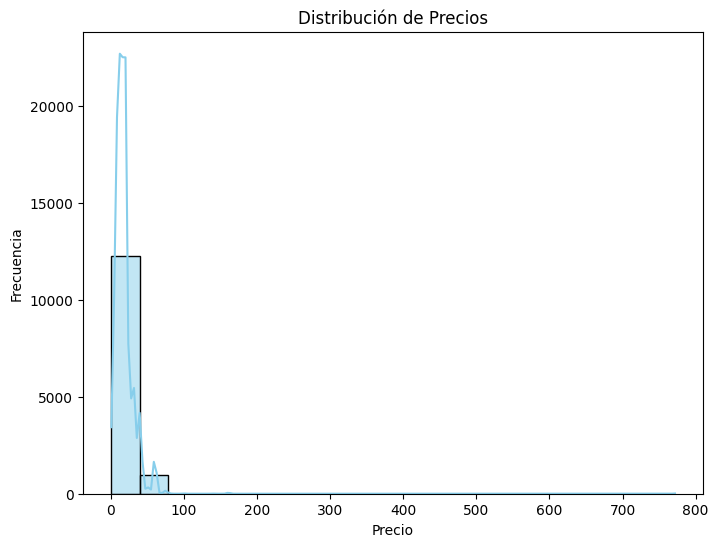

In [23]:
# Crear un histograma para la columna 'price'
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['price'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

vamos a observar la mediana, los cuartiles y los posibles valores atípicos en una variable.

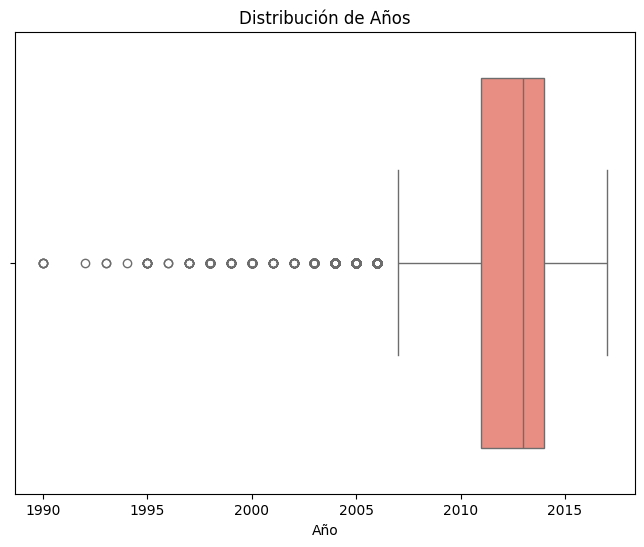

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_df['year_x'], color='salmon')
plt.title('Distribución de Años')
plt.xlabel('Año')
plt.show()

El gráfico de densidad muestra la distribución de una variable de manera suave y continua

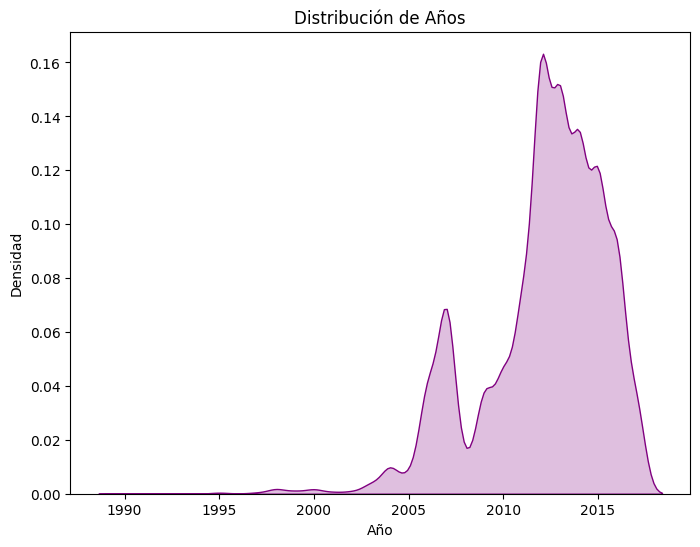

In [26]:
plt.figure(figsize=(8, 6))
sns.kdeplot(merged_df['year_x'], fill=True, color='purple')
plt.title('Distribución de Años')
plt.xlabel('Año')
plt.ylabel('Densidad')
plt.show()

C:\Users\jeiso\AppData\Local\Temp\ipykernel_28396\639496240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


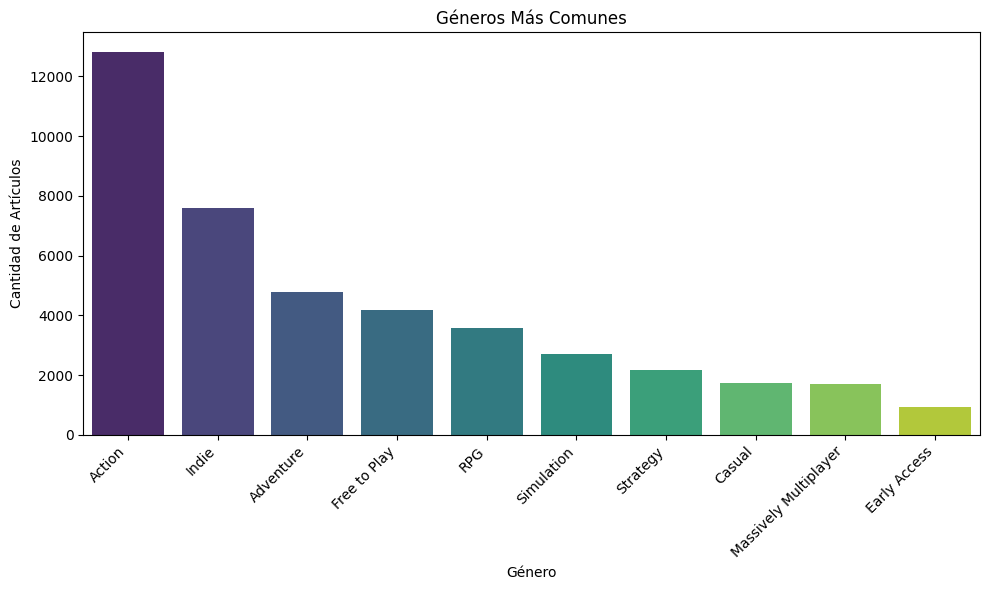

In [27]:
# Crear un gráfico de barras para los géneros más comunes
plt.figure(figsize=(10, 6))
top_genres = merged_df['genres'].explode().value_counts().nlargest(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Géneros Más Comunes')
plt.xlabel('Género')
plt.ylabel('Cantidad de Artículos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
# miramos valores de recommend
recommend_values = merged_df["recommend"]
print(recommend_values)

0         True
1         True
2         True
3         True
4         True
         ...  
18467     True
18468     True
18469     True
18470    False
18471     True
Name: recommend, Length: 18472, dtype: bool
